## Market Basket Analysis

### Association Rule Mining

`Association rule learning` is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness.

First of all, we need to know some terms about Association Rules.

- **Support: Support is an indication of how frequently the itemset appears in the dataset.**

Support is a so-called frequency constraint. Its main feature is that it possesses the property of down-ward closure which means that all sub sets of a frequent set (support > min. support threshold) are also frequent. This property (actually, the fact that no super set of a infrequent set can be frequent) is used to prune the search space (usually a tree of item sets with increasing size) in level-wise algorithms (e.g., the APRIORI algorithm). The disadvantage of support is the rare item problem. Items that occur very infrequently in the data set are pruned although they would still produce interesting and potentially valuable rules.

- **Confidence: Confidence is an indication of how often the rule has been found to be true.**

Confidence is not down-ward closed and was developed together with support (the so-called support-confidence framework). While support is used to prune the search space and only leave potentially interesting rules, confidence is used in a second step to filter rules that exceed a min. confidence threshold. A problem with confidence is that it is sensitive to the frequency of the consequent (Y) in the data set. Caused by the way confidence is calculated, Ys with higher support will automatically produce higher confidence values even if they exists no association between the items.

- **Lift: The ratio of the observed support to that expected if X and Y were independent.**

Leverage measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent. The rational in a sales setting is to find out how many more units (items X and Y together) are sold than expected from the independent sells. Using min. leverage thresholds at the same time incorporates an implicit frequency constraint. E.g., for setting a min. leverage thresholds to 0.01% (corresponds to 10 occurrence in a data set with 100,000 transactions) one first can use an algorithm to find all itemsets with min. support of 0.01% and then filter the found item sets using the leverage constraint. Because of this property leverage also can suffer from the rare item problem.

- **Conviction:** The ratio of the expected frequency that X occurs without Y (that is to say, the frequency that the rule makes an incorrect prediction) if X and Y were independent divided by the observed frequency of incorrect predictions.

Conviction compares the probability that X appears without Y if they were dependent with the actual frequency of the appearance of X without Y. In that respect it is similar to lift (see section about lift on this page), however, it contrast to lift it is a directed measure. Furthermore, conviction is monotone in confidence and lift.

- **Leverage:** Leverage measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent.

The rational in a sales setting is to find out how many more units (items X and Y together) are sold than expected from the independent sells. Using min. leverage thresholds at the same time incorporates an implicit frequency constraint. E.g., for setting a min. leverage thresholds to 0.01% (corresponds to 10 occurrence in a data set with 100,000 transactions) one first can use an algorithm to find all itemsets with min. support of 0.01% and then filter the found item sets using the leverage constraint. Because of this property leverage also can suffer from the rare item problem. [Michael Hahsler]

### Dataset

### Importing libraries

In [19]:
# Libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from apyori import apriori

In [20]:
#dataset
df = pd.read_excel('/Users/mhlaghari/Documents/Documents/NYU/Module 2 \
/Data Mining in R/InClass/Case 1 - Recommendations/BigBasket Data IMB575-XLS-ENG (1).xlsx',sheet_name= 'POS DATA')

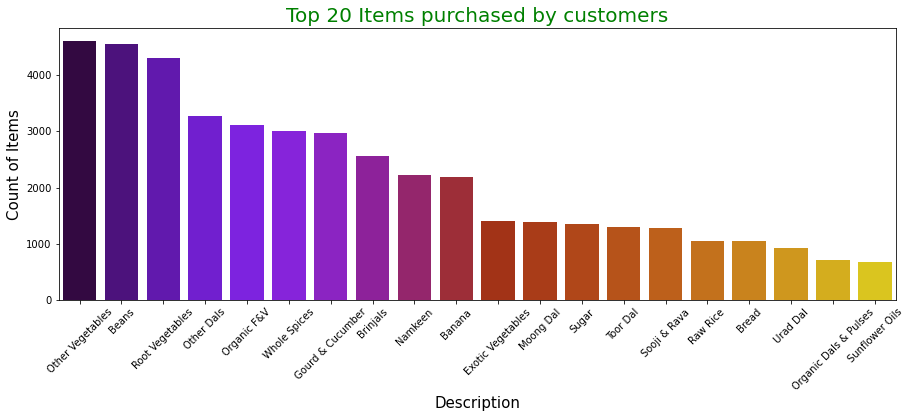

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Description.value_counts().head(20).index, y = df.Description.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Description', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

### Data Engineering

In [3]:
#To see all columns
df.columns

Index(['Member', 'Order', 'SKU', 'Created On', 'Description'], dtype='object')

In [4]:
#Dropping unnecessary columns ['Member', 'SKU', 'Created On']
#Setting index to 'Order'
#Grouping by 'Order'

df2 = df.drop(['Member', 'SKU', 'Created On'],axis=1).set_index('Order')\
.groupby('Order')['Description'].apply(list).reset_index().drop('Order',axis=1)\
['Description'].apply(pd.Series)

In [10]:
#Saving the cleaned dataset 
df2.to_csv('Market_Basket_Cleaned.csv', header= False, index= False)

In [11]:
dataset = pd.read_csv('Market_Basket_Cleaned.csv'\
                      ,header= None)
transaction = []
for i in range(0,8387):
    transaction.append([str(dataset.values[i,j]) for j in range(0,42)])

### Apriori

Using the `apriori` algorithm, we set a few parameters.
- min_support = Caluclated by days of the week * the number of times a product appears together / the dataset
- min_confidence = should be between 0 - 1; varies on the business case
- min_lift = at least the number of times you wish to see the items together
- min/max_length = best deals for a buy 1 get 1 free offer


In [22]:
# Assuming our dataset is for 1 week, our min_support = 0.0025 (3 * 7/ 8387); 
#where:
#3 = times the product must appear together
#7 = 7 days in a week

rules = apriori(transactions= transaction, min_support = 0.0025, \
                min_confidence = 0.2, min_lift = 2, min_length = 2, \
                max_length = 2)

In [23]:
results = list(rules)
results

[RelationRecord(items=frozenset({'Almonds', 'Cashews'}), support=0.02170025038750447, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Almonds'}), items_add=frozenset({'Cashews'}), confidence=0.35, lift=5.63426103646833), OrderedStatistic(items_base=frozenset({'Cashews'}), items_add=frozenset({'Almonds'}), confidence=0.3493282149712092, lift=5.63426103646833)]),
 RelationRecord(items=frozenset({'Other Dry Fruits', 'Almonds'}), support=0.017169428878025517, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Almonds'}), items_add=frozenset({'Other Dry Fruits'}), confidence=0.27692307692307694, lift=4.838653846153846), OrderedStatistic(items_base=frozenset({'Other Dry Fruits'}), items_add=frozenset({'Almonds'}), confidence=0.30000000000000004, lift=4.838653846153847)]),
 RelationRecord(items=frozenset({'Raisins', 'Almonds'}), support=0.012877071658519137, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Almonds'}), items_add=frozenset({'Raisins'}), confidenc

In [25]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
results_df = pd.DataFrame(inspect(results), columns= ['Left Hand Side',' Right Hand Side',\
                                                      'Supports', 'Confidences' ,'Lifts'])

### Conclusion

**Top 10** rules sorted by **Lift**

As shown below, the top item, if customers buy `Organic Flour` there is a _*25% chance*_ that they will buy `Organic Sale, Sugar & Jaggery` too. 

In [27]:
# Displaying top 10 rules 
results_df.nlargest(n = 10, columns='Lifts')

,Left Hand Side,Right Hand Side,Supports,Confidences,Lifts
90,Organic Flours,"Organic Salt,Sugar & Jaggery",0.006319,0.256039,13.014522
84,Organic Dals & Pulses,"Organic Salt,Sugar & Jaggery",0.009181,0.220630,11.214709
103,Other Flours,Rice Flour,0.004173,0.233333,10.087457
81,Organic Dals & Pulses,Organic Flours,0.010016,0.240688,9.751921
91,"Organic Salt,Sugar & Jaggery",Organic Masalas & Spices,0.006439,0.327273,9.464953
53,Rice Flour,Jaggery,0.006319,0.273196,7.955881
88,Organic Flours,Organic Masalas & Spices,0.006439,0.260870,7.544528
82,Organic Dals & Pulses,Organic Masalas & Spices,0.009658,0.232092,6.712252
89,Organic Flours,Organic Rice & Rice Products,0.005604,0.227053,6.705263
83,Organic Dals & Pulses,Organic Rice & Rice Products,0.009300,0.223496,6.600206
